# Probability and Statistics in Gaussian models: An Introduction

We provide here an introductory overview of the main notions of probability and statistics needed for the course. They are centered around Multivariate Gaussian models and include the concepts of conditional probability, statistical independence, correlation, parameter estimation and null hypothesis testing.

The blocks are the following:

1) Multivariate Gaussian model

2) Conditional probability, correlation & independence

3) Mean and Covariance Estimation 

4) Null hypothesis testing

References:
Papoulis A, Pillai SU. Probability, random variables, and stochastic processes. Tata McGraw-Hill Education; 2002.
Duda RO, Hart PE, Stork DG. Pattern classification. John Wiley & Sons; 2012.


## Multivariate Gaussian model
In this section we introduce the concept of Multivariate Gaussian models, we learn how they are parametrized and how can they can be sampled in simulated studies. 

-Multivariate Gaussian density parameters: Mean, covariance and precision matrix

-Properties of the covariance matrix: Symmetry and positive definiteness

-Gaussian Marginalisation 






Covariance matrix 2D
[[ 1  1]
 [ 1 10]]
Eigenvalues
[ 0.89022777 10.10977223]


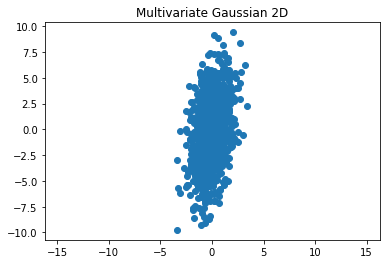

In [10]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt



#Setting parameters
#mean
mean = np.array([0, 0]) 
#covariance parameters
D1=1
D2=10
c12=1
#covariance matrix
cov = np.array([[D1, c12], [c12, D2]])


#printing covariance matrix
print ("Covariance matrix 2D")
print(np.matrix(cov))

#checking postive definitness propoerty of covariance
l, v = LA.eig(cov)
#print eigenvalues
print ("Eigenvalues")
print(l)
 
    

#Sampling and plotting MVGM of dimension 2
N = 1000 # number of samples
x, y = np.random.multivariate_normal(mean, cov, N).T
plt.figure()
plt.title('Multivariate Gaussian 2D')
plt.plot(x, y, 'o')
plt.axis('equal')
plt.show()



### Marginal distributions

Covariance matrix 3D
[[ 1  1  0]
 [ 1  5  1]
 [ 0  1 10]]
Eigenvalues
[ 0.7580866   5.04536524 10.19654815]


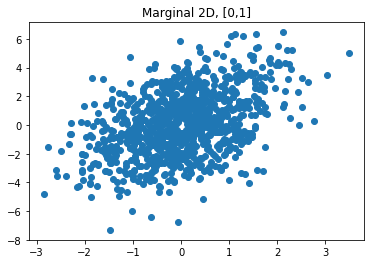

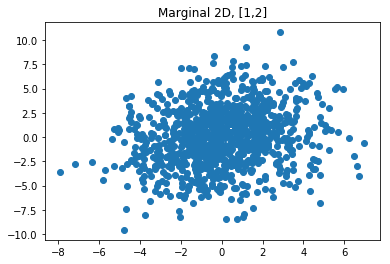

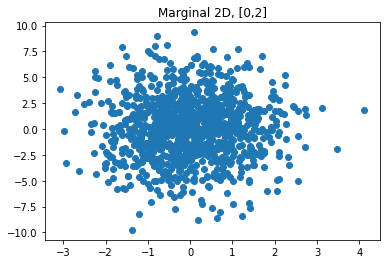

In [11]:



#Sampling marginal distributions from a MVGM
#mean
mean2 = [0, 0, 0] 
#covariance parameters
#covariance matrix
D1=1
D2=5
D3=10
c12=1
c13=0
c23=1
cov2 = np.array([[D1, c12, c13], [c12, D2, c23], [c13, c23, D3]])



#printing covariance matrix
print ("Covariance matrix 3D")
print(np.matrix(cov2))

#checking postive definitness propoerty of covariance
l, v = LA.eig(cov2)
#print eigenvalues
print ("Eigenvalues")
print(l)
N = 1000 # number of samples
x1,x2 = np.random.multivariate_normal(mean2[0:2],cov2[:2,:2], N).T
x3,x4 = np.random.multivariate_normal(mean2[1:3],cov2[1:3,1:3], N).T
x5,x6 = np.random.multivariate_normal(mean2[0:3:2],cov2[0:3:2,0:3:2], N).T
plt.figure()
plt.title('Marginal 2D, [0,1]')
plt.plot(x1,x2, 'o')
plt.show()
plt.figure()
plt.title('Marginal 2D, [1,2]')
plt.plot(x3,x4,'o')
plt.show()
plt.figure()
plt.title('Marginal 2D, [0,2]')
plt.plot(x5,x6,'o')
plt.show()
   

# Conditional probability, independence and correlation

In this section, we discuss the concepts of Conditional probability, Statistical independence and Correlation



In [12]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


#Sampling Multivariate Conditional Gaussian Distributions

#Setting parameters
#mean
#mean
mean = [0, 0, 0] 
#covariance parameters
#covariance matrix
D1=1
D2=5
D3=10
c12=1
c13=0
c23=1
cov = np.array([[D1, c12, c13], [c12, D2, c23], [c13, c23, D3]])


#printing covariance matrix
print ("Covariance matrix")
print(np.matrix(cov))

#checking postive definitness propoerty of covariance
l, v = LA.eig(cov)
#print eigenvalues
print ("Covariance Eigenvalues")
print(l)










Covariance matrix
[[ 1  1  0]
 [ 1  5  1]
 [ 0  1 10]]
Covariance Eigenvalues
[ 0.7580866   5.04536524 10.19654815]


## Conditional univariate [0|1,2]

Mean
0.3673469387755102
Variance
0.7959183673469388


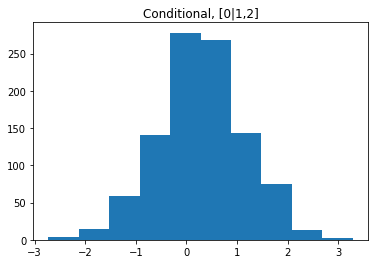

In [13]:

N = 1000 # number of samples
#1. Univariate Conditional Gaussian (0|1,2)
x12=np.array([2,2])
inv_mat=np.linalg.inv(cov[1:3,1:3])
cross_term=cov[0][1:3]
mu_cond=mean[0]+np.dot(cross_term,np.dot(inv_mat,np.transpose(x12-mean[1:3])))
sigma_cond=cov[0,0]-np.dot(cross_term,np.dot(inv_mat,cross_term.T))
print("Mean")
print(mu_cond)
print("Variance")
print(sigma_cond)
x0= np.random.normal(mu_cond,np.sqrt(sigma_cond), N).T #Data sampling
plt.figure()
plt.title('Conditional, [0|1,2]')
plt.hist(x0)
#plt.plot(x0, 'o')
plt.show()


## Conditional multivariate [0,1|2]

Mean
[0 0]
Covariance matrix
[[4 0]
 [0 9]]


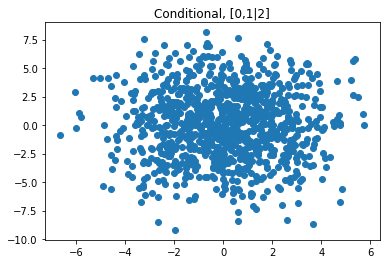

In [14]:

#2. Multivariate Conditional Gaussian (0,1|2)
x0=np.array([0])
inv_mat=np.reciprocal(cov[0,0])
cross_term=np.array(cov[:2,2])
mu_cond2=mean[1:3]+cross_term*inv_mat*(x0-mean[0])
sigma_cond2=cov[1:3,1:3]-inv_mat*np.dot(cross_term,cross_term.T)
print("Mean")
print(mu_cond2)
print("Covariance matrix")
print(sigma_cond2)
x1, x2= np.random.multivariate_normal(mu_cond2,sigma_cond2, N).T
plt.figure()
plt.title('Conditional, [0,1|2]')
plt.plot(x1,x2, 'o')
plt.show()

# Estimation
In this section we review the esimation of mean and covariance from Gaussian samples.

-Mean estimation

-Covariance estimation


In [15]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


mean = [0, 0, 0] 
#covariance parameters
#covariance matrix
D1=1
D2=5
D3=10
c12=1
c13=0
c23=1
cov = np.array([[D1, c12, c13], [c12, D2, c23], [c13, c23, D3]])


#printing covariance matrix

print ("Mean")
print(np.matrix(mean))
print ("Covariance matrix")
print(np.matrix(cov))

#checking postive definitness propoerty of covariance
l, v = LA.eig(cov)
#print eigenvalues
print ("Covariance Eigenvalues")
print(l)

Mean
[[0 0 0]]
Covariance matrix
[[ 1  1  0]
 [ 1  5  1]
 [ 0  1 10]]
Covariance Eigenvalues
[ 0.7580866   5.04536524 10.19654815]


In [16]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


N = 10000 # number of samples
x,y,z= np.random.multivariate_normal(mean, cov, N).T #Data sampling

#Mean estimation
mean_hat=np.zeros(3)
mean_hat[0]=np.mean(x) #Sample Mean
mean_hat[1]=np.mean(y) #Sample Mean
mean_hat[2]=np.mean(z) #Sample Mean

print ("Sample mean")
print(mean_hat)

print("Frobenius-norm error between original and estimated mean = %1.2e" %(LA.norm(mean-mean_hat)))



Sample mean
[-0.00283223  0.00456492  0.05545692]
Frobenius-norm error between original and estimated mean = 5.57e-02


In [17]:
#Sample Covariance (biased and unbiased)
X=np.reshape([x,y,z], (3,N))
cov_hat0=np.zeros((3,3))
for i in range(N):
    var=np.reshape(np.array(X[:,i]-mean_hat),(3,1))
    cov_hat0+=np.dot(var, var.T)
    
cov_hat_biased=cov_hat0/N; 
cov_hat_unbiased=cov_hat0/(N-1); 
print ("Sample covariance (biased)")
print(cov_hat_biased)
print ("Sample covariance (unbiased)")
print(cov_hat_unbiased)



print("Frobenius-norm error between original and unbiasedly estimated covariance = %1.2e" %(LA.norm(cov-cov_hat_unbiased)))


Sample covariance (biased)
[[ 1.01178405  1.01356524 -0.07375034]
 [ 1.01356524  5.04803227  0.91107551]
 [-0.07375034  0.91107551  9.92527301]]
Sample covariance (unbiased)
[[ 1.01188524  1.0136666  -0.07375772]
 [ 1.0136666   5.04853712  0.91116662]
 [-0.07375772  0.91116662  9.92626564]]
Frobenius-norm error between original and unbiasedly estimated covariance = 1.87e-01


# Null-hypothesis testing (t-test, welch test, effect sizes and multiple testing)
In this section we review null-hypothesis testing

-Model and assumptions

-Computation of p-values and effect sizes

-Multiple hypothesis testing

## Testing the difference of two independent samples (I)
We first review the t-test between the mean of two independent normally distributed samples (with possibly different sample sizes) when both sample variances are equal and discuss the importance of using effect sizes quantifiers.

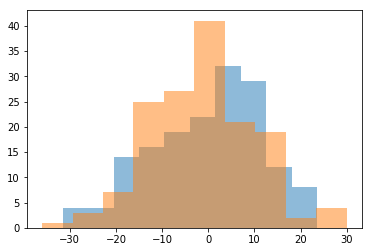

p-value = 3.96e-01
effect size = 9.70e-02
Which is the robust quantifier with respect to the sample size increases?


In [19]:
import numpy as np
from numpy import linalg as LA
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt



#Here the pooled standard deviation accounts for unequal sample sizes
def effect_size_cohensD_unpaired(mean1,std1,count1,mean2,std2,count2):
    dof = (count1 + count2 - 2)
    cohens_d_unpaired = abs(mean1 - mean2) / np.sqrt(((count1 - 1) * std1 ** 2 + (count2 - 1) * std2 ** 2) / dof)
    return cohens_d_unpaired


#unpaired t-test (equal variances)
#Distribution parameters
mu0=0
mu1=1
sigma=12

#Sample sizes
#small sample regime
N0=160   
N1=150
#large sample regime
#N0=1600   
#N1=1500

#Sampling and histograms
a = np.random.normal(mu0, sigma, N0)#Distribution A
b = np.random.normal(mu1, sigma, N1)#Distribution B
plt.figure()
plt.hist(a, alpha=0.5)
plt.hist(b, alpha=0.5)
plt.show()

#Computation and report of p-values and effect sizes
print("p-value = %1.2e" %(ttest_ind(a, b)[1]))
print("effect size = %1.2e" %(effect_size_cohensD_unpaired(np.mean(a),np.std(a),N0,np.mean(b),np.std(b),N1)))
print("Which is the robust quantifier with respect to the sample size increases?")







    
    

## Testing the difference of two independent samples (II)
We then review a variation of the t-test, Welch test, that must be applied when the two independent normally distributed samples have unequal variances.

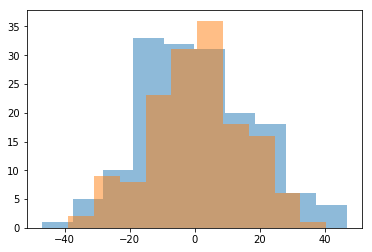

NameError: name 'ttest_ind' is not defined

In [18]:
#Welch t-test (unequal variances)

mu0=0
sigma0=16
mu1=1
sigma1=14

#Sample sizes
#small sample regime
N0=160   
N1=150
#large sample regime
#N0=5100   
#N1=5000

#Sampling and histograms
a = np.random.normal(mu0, sigma0, N0)#Distribution A
b = np.random.normal(mu1, sigma1, N1)#Distribution B
plt.figure()
plt.hist(a, alpha=0.5)
plt.hist(b, alpha=0.5)
plt.show()

#Computation and report of p-values and effect sizes
print("p-value = %1.2e" %(ttest_ind(a, b, equal_var=False)[1]))
print("effect size = %1.2e" %(effect_size_cohensD_unpaired(np.mean(a),np.std(a),N0,np.mean(b),np.std(b),N1)))



## Testing the difference between paired independent samples (II)
We also consider the case of testing the mean difference between two samples that are paired (and hence, not independent) due to some correlated measurement structure (e.g. measuring scores before and after an intervention). 

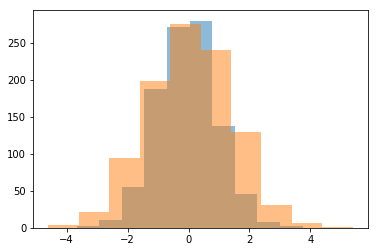

p-value = 5.26e-03
effect size = 8.85e-02


In [34]:
#paired t-test
def effect_size_cohensD_paired(mean1,mean2,std):
    cohens_d_paired = abs(mean1 - mean2) /std
    return cohens_d_paired

#Distributions parameters
mu0=0
sigma=1
d=0.1;
s=1;

#Sample sizes
#small sample regime
N=50
#large sample regime
N=1000  

#Sampling and histograms
a = np.random.normal(mu0, sigma, N)#Distribution A
b=a+d+np.random.normal(0,1,N)


plt.figure()
plt.hist(a, alpha=0.5)
plt.hist(b, alpha=0.5)
plt.show()

#Computation and report of p-values and effect sizes
print("p-value = %1.2e" %(ttest_rel(a, b)[1]))
print("effect size = %1.2e" %(effect_size_cohensD_paired(np.mean(a-b),0,np.std(a-b))))

## Multiple hypothesis testing
Finally, we discuss the problem of multiple hypothesis testing. 
First, we consider two Gaussian samples generated with the same parameters and perform 100 test with a significance threshold of 0.05. 

In [40]:
from numpy import linalg as LA
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import numpy as np



mu=0;
sigma=1;
N0=100;
N1=120;

#number of tests
num_tests=100;
#significance threshold
alpha=0.05

var=0
for i in range(num_tests):
    a = np.random.normal(mu,sigma,N0)#Distribution A
    b = np.random.normal(mu,sigma,N1)#Distribution B
    if (ttest_ind(a, b)[1]<alpha): var+=1
    
print("Number of significant tests is %1.2e" %(var))

Number of significant tests is 7.00e+00


Can we quantify the probability that at least one of the tests incorrectly tields significance?

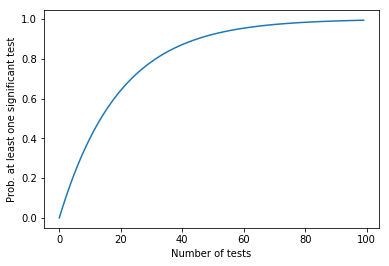

In [39]:
p=np.zeros(num_tests)
for i in range(num_tests):
    p[i]=1-(1-alpha)**i #From Binomial distribution


plt.figure()
plt.plot(list(range(num_tests)),p)
plt.xlabel('Number of tests')
plt.ylabel('Prob. at least one significant test')
plt.show()



How can we correct this multiplicity?

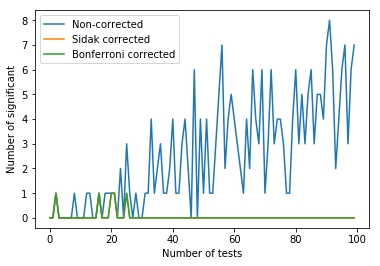

In [20]:
num_tests=100
mu=0;
sigma=1;
N0=100;
N1=120;


alpha=0.05


perc_sign=np.zeros(num_tests)
perc_sign_Sidak=np.zeros(num_tests)
perc_sign_Bonferroni=np.zeros(num_tests)

for j in range(num_tests):
    alpha_Sidak=1-(1-alpha)**(1/(j+1))
    alpha_Bonferroni=alpha/(j+1)
    
    var=0
    var_Sidak=0
    var_Bonferroni=0
    
    for i in range((j+1)):
        a = np.random.normal(mu,sigma,N0)#Distribution A
        b = np.random.normal(mu,sigma,N1)#Distribution B
        if (ttest_ind(a, b)[1]<alpha): var+=1
        if (ttest_ind(a, b)[1]<alpha_Sidak): var_Sidak+=1
        if (ttest_ind(a, b)[1]<alpha_Bonferroni): var_Bonferroni+=1
            
    perc_sign[j]=var
    perc_sign_Sidak[j]=var_Sidak
    perc_sign_Bonferroni[j]=var_Bonferroni
     
    
plt.figure()
plt.plot(list(range(num_tests)),perc_sign)
plt.plot(list(range(num_tests)),perc_sign_Sidak)
plt.plot(list(range(num_tests)),perc_sign_Bonferroni)
plt.legend(('Non-corrected', 'Sidak corrected', 'Bonferroni corrected'))
plt.xlabel('Number of tests')
plt.ylabel('Number of significant')
plt.show()





    
        

# Warming-up recommended Exercises 

Once you are familiar with the datasets, start practicing:

1) Select 5 signals. For each individual signal, obtain different estimated samples of its mean under two different experimental conditions (e.g. movie vs. rest). These samples can be obtained from different runs of the experiment or from different temporal windows within a run. Then,  test the significance of the difference between both mean (one per conidtion) using appropriate correction for multiple hypothesis testing (remember that there is one test per signal).

2) Repeat the same procedure of 1) with 5 signal pairs: Obtain estimation samples of their covariance coefficients under distinct experimental conditions and test significance of mean differences.  